In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./Datasets/Extra_Assignment_Database.csv')
df.head()

,Subject,Gender,Age (years),Weight (Kg),Height (m),IMC,RIGHT FOOT,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,LEFT FOOT,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,General,LCA,LPA,MCA,...,TCI,General,LCA,LPA,MCA,MPA,TCI,NaN,NaN,NaN
1,CG001,M,25.0,67.0,1.83,20.01,25.91,26.02,25.43,26.31,...,0.12,25.45,25.87,24.83,26.08,25.36,0.46,NaN,LCA,26.1
2,CG002,M,26.0,80.0,1.66,29.03,28.01,27.63,27.77,28.09,...,1.97,28.08,27.73,27.71,28.52,28.39,2.09,NaN,LPA,25.7
3,CG003,M,24.0,60.0,1.68,21.26,29.59,30.08,29.12,30.21,...,3.79,29.45,30.13,28.93,30.17,29.05,3.57,NaN,MCA,26.4
4,CG004,F,22.0,65.0,1.55,27.06,27.88,27.68,27.51,28.52,...,1.82,27.66,27.55,27.34,28.27,26.84,1.50,NaN,MPA,25.8


In [3]:
df = df.iloc[1:]

In [4]:
df["Age (years)"] = pd.to_numeric(df["Age (years)"], errors="coerce")
df["Weight (Kg)"] = pd.to_numeric(df["Weight (Kg)"], errors="coerce")
df["Height (m)"] = pd.to_numeric(df["Height (m)"], errors="coerce")
df["IMC"] = pd.to_numeric(df["IMC"], errors="coerce")

In [5]:
df = df.dropna(subset=["Age (years)", "Weight (Kg)", "Height (m)", "IMC"])

In [6]:
X = df[["Age (years)", "Weight (Kg)", "Height (m)"]]
y = df["IMC"]

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [11]:
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 4.055496296296298


In [12]:
import matplotlib.pyplot as plt

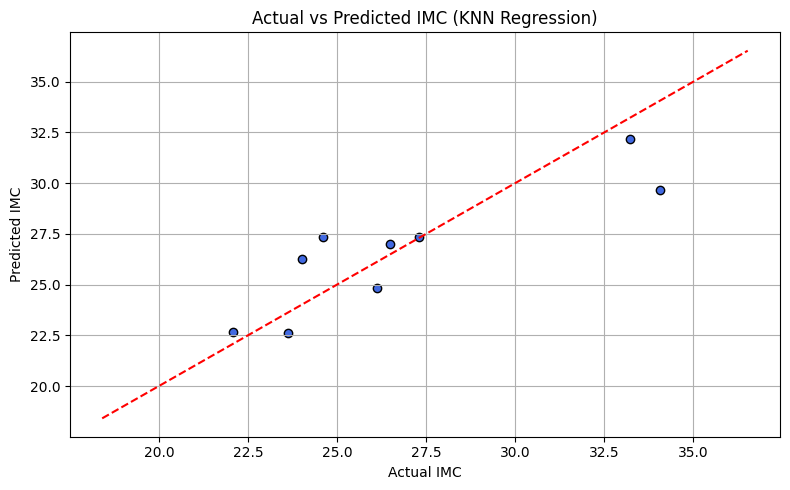

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='royalblue', edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Reference line (Perfect Prediction)
plt.xlabel("Actual IMC")
plt.ylabel("Predicted IMC")
plt.title("Actual vs Predicted IMC (KNN Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()